# Importing python packages

In [2]:
#Data preprocessing packages
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 200)


#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob



# Testing Sentiment Analysis (sample)

In [3]:
#Testing NLP-Sentimental Analaysis using TextBlob
TextBlob("The movie is good ").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

# Importing YouTube comments data

In [5]:
#Importing YouTube comments data
comm = pd.read_csv("UScomments.csv");#opening the file UScomments

# Displaying first 5 rows of data

In [8]:
#Displaying the first 5 rows of the data
print(comm.head())

      video_id  \
0  XpVt6Z1Gjjo   
1  XpVt6Z1Gjjo   
2  XpVt6Z1Gjjo   
3  XpVt6Z1Gjjo   
4  XpVt6Z1Gjjo   

                                                                              comment_text  \
0                                                        Logan Paul it's yo big day ‼️‼️‼️   
1  I've been following you from the start of your vine channel and have seen all 365 vlogs   
2                                                       Say hi to Kong and maverick for me   
3                                                                      MY FAN . attendance   
4                                                                               trending 😉   

   likes  replies  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0    4.0      0.0         NaN         NaN         NaN         NaN         NaN   
1    3.0      0.0         NaN         NaN         NaN         NaN         NaN   
2    3.0      0.0         NaN         NaN         NaN         NaN         NaN   
3 

In [9]:
# Display the shape of the DataFrame
print("Shape = {}".format(comm.shape))

Shape = (18715, 11)


# Extracting 1000 random samples from the data

In [10]:
# Extract 1000 random samples from the data
comm_sample = comm.sample(1000);

# Calculating Sentiment polarity for each comment

In [11]:
#Calculating the Sentiment Polarity
pol=[] # list which will contain the polarity of the comments
for i in comm.comment_text.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)

    except:
        pol.append(0)

# Adding the Sentiment Polarity column to the data

In [12]:
#Adding the Sentiment Polarity column to the data
comm['pol']=pol

# Converting the polarity values from continuous to categorical

In [13]:
#Converting the polarity values from continuous to categorical
comm['pol'][comm.pol==0]= 0
comm['pol'][comm.pol > 0]= 1
comm['pol'][comm.pol < 0]= -1

<ipython-input-13-bb14eb197040>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm['pol'][comm.pol==0]= 0
<ipython-input-13-bb14eb197040>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm['pol'][comm.pol > 0]= 1
<ipython-input-13-bb14eb197040>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm['pol'][comm.pol < 0]= -1


# Displaying Positive comments

comm[comm.pol==1]: This syntax uses boolean indexing to filter the DataFrame comm. It checks each row in the pol column and selects only the rows where the value is equal to 1. The resulting DataFrame, df_positive, will contain only the positive comments.

In [14]:
#Displaying the POSITIVE comments
df_positive = comm[comm.pol==1]
df_positive.head(10)

,video_id,comment_text,likes,replies,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,pol
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
11,XpVt6Z1Gjjo,"Dear Logan, I really wanna get your Merch but I don't have the money. We don't even have a Car. It would really make my day to have any of your merch",0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
13,XpVt6Z1Gjjo,Casey is still better then logan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
15,XpVt6Z1Gjjo,He happy cause he in a movie,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
18,XpVt6Z1Gjjo,It's been fun watching you grow. I'm at 42 days straight and can't seem to grow. Any advice?,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
22,XpVt6Z1Gjjo,"lol PEWDIEPIE accidentally played song with words nig%%r during his stream, u can watch that part on my channel, i've just uploaded. Like so more ppl could see this",0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
24,XpVt6Z1Gjjo,I love Logan and Jake so much and thay are so amazing and I look up to them so much 😍💋💙👍,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
27,XpVt6Z1Gjjo,if you get allot of diss likes do you get on the top comments? lets see diss like this please,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
29,XpVt6Z1Gjjo,I love you so much I love to meet you But I live in Israel You really inspire me I really like your channel Keep doing what you do\nBecause everyone loves it and will be Unique and Pashan will be ...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
30,XpVt6Z1Gjjo,👈 watch by clicking here you can see people's are entertaining,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


# Displaying Negative comments

In [15]:
#Displaying the NEGATIVE comments
df_positive = comm[comm.pol==-1]
df_positive.head(10)

,video_id,comment_text,likes,replies,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,pol
9,XpVt6Z1Gjjo,You and your shit brother may have single handedly ruined YouTube.....thanks...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
12,XpVt6Z1Gjjo,Honestly Evan is so annoying. Like its not funny watching him try to be famous he's trying way to hard and I don't like it,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
16,XpVt6Z1Gjjo,"Ayyyyoooo Logang what up . This was a hard vlog to watch Logan how dare are you to destroyed that YouTube bag . Logang Army check my covers and share them can Logang help me to hit 1,000 Subscri...",1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
19,XpVt6Z1Gjjo,Made a lot of people hate youtube - GJ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
28,XpVt6Z1Gjjo,Evan is a horrible human being he also looks so jealous when you open it like he should be happy for you,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
34,XpVt6Z1Gjjo,Gotta love Youtube for giving morons the ability to earn a buck from other morons.,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
36,XpVt6Z1Gjjo,Can the Pauls please stop saying they're the fastest growing YouTube channels?! That's PewDiePie's position!! He made managed to get all the subscribers you guys have in 6 MONTHS!!! Why is that so...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
42,XpVt6Z1Gjjo,Not a hater but fuck you,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
43,XpVt6Z1Gjjo,Where is the other dog,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
44,XpVt6Z1Gjjo,I go out of my way to dislike every single one your videos,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0


# Displaying Neutral comments

In [16]:
#Displaying the NEUTRAL comments
df_positive = comm[comm.pol==0]
df_positive.head(10)

,video_id,comment_text,likes,replies,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,pol
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your vine channel and have seen all 365 vlogs,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,XpVt6Z1Gjjo,trending 😉,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
10,XpVt6Z1Gjjo,There should be a mini Logan Paul too!,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
14,XpVt6Z1Gjjo,aw geez rick this guy is the face of YouTube.,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


# Calculating the count of Positive, Negative & Neutral comments

 1.0    7992
 0.0    7611
-1.0    3112
Name: pol, dtype: int64

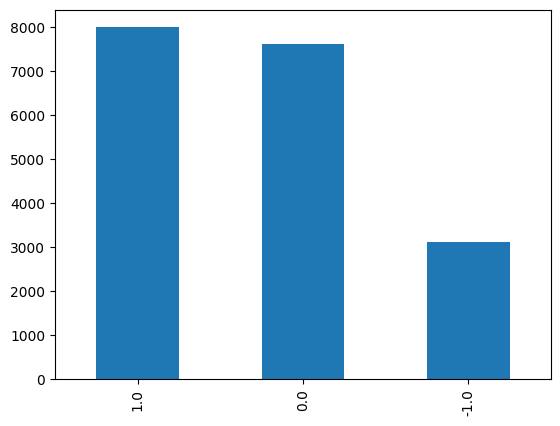

In [17]:
comm.pol.value_counts().plot.bar()
comm.pol.value_counts()